# Treinando IO com Pandas

In [1]:
#importando a biblioteca
import pandas as pd

In [2]:
#Conectando o pandas com JSon
nome_M = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nome_F = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [3]:
#visualizando o DF
nome_F

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [4]:
nome_M

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [5]:
#Somando a qtd de alunos
print("A quantidade de alunos:" , len(nome_F) + len(nome_M), end='.\n')

A quantidade de alunos: 400.


In [6]:
#Fazendo a junção dos dois frame
frames = [nome_F, nome_M]

In [7]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

In [8]:
#usando a função do pandas para concatenar
nomes = pd.concat(frames) ['nome'].to_frame()

In [9]:
#pegando 5 nomes aleatórios
nomes.sample(5)

,nome
48,RENATO
88,GILMAR
6,MARCIA
19,MARIANA
146,WILIAN


# Inserindo os ID's dos alunos

In [10]:
#importando a biblioteca numpy para gerar os ids
import numpy as np
#gerando um numero aleatório
np.random.seed(123)

In [11]:
#Armazenando o total de alunos 
total_alunos = len(nomes)
total_alunos

400

In [12]:
#criando uma nova coluna para os id's, gerando um numero aletório com a função 'permutation'
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [13]:
nomes.sample(3)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382


In [14]:
#objetivo
#criar dominios de e-mails para a escola enviar informações para os alunos
#criando uma lista com os dominios
dominios = ['@dominiodoemail.com.br', '@servicosdoemail.com']
#criando mais duas colunas no dataframes, uma para dominio outra para o email
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [15]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicosdoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [16]:
#criar uma coluna para emails, fazendo a concatenação dos nomes com dominios
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [17]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicosdoemail.com,daiane@servicosdoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando Cursos

In [18]:
#instalando pacotes para realizar importação em html
!pip3 install html5lib
!pip3 install lxml

In [19]:
#importando a biblioteca
import html5lib

In [20]:
#configurando fontes
url = 'http://tabela-cursos.herokuapp.com/index.html#'
#atribuido valores ao curso
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [21]:
type(cursos)

list

In [22]:
#transformando em dataframe
cursos = cursos[0]

In [23]:
type(cursos)

pandas.core.frame.DataFrame

In [24]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o Index de cursos

In [25]:
#renomeando as colunas
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [26]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [27]:
#criando uma coluna do ID cursos
cursos['id'] = cursos.index + 1

In [28]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [29]:
#setando um novo indice para o dataframe
cursos = cursos.set_index('id')

In [30]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [31]:
#visualizando os aluno
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicosdoemail.com,rebeca@servicosdoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicosdoemail.com,joaquim@servicosdoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


# Matriculando os aluno no cursos

In [32]:
#adicionando uma nova coluna
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [33]:
nomes.sample(10)

,nome,id_aluno,dominio,email,matriculas
133,RUAN,130,@servicosdoemail.com,ruan@servicosdoemail.com,1
44,RAIMUNDA,259,@servicosdoemail.com,raimunda@servicosdoemail.com,1
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,1
45,ADRIANO,196,@servicosdoemail.com,adriano@servicosdoemail.com,2
117,PAMELA,189,@dominiodoemail.com.br,pamela@dominiodoemail.com.br,1
45,ANDREIA,37,@dominiodoemail.com.br,andreia@dominiodoemail.com.br,1
116,DOMINGOS,150,@servicosdoemail.com,domingos@servicosdoemail.com,1
145,FRANCIELE,316,@dominiodoemail.com.br,franciele@dominiodoemail.com.br,1
52,SAMUEL,220,@dominiodoemail.com.br,samuel@dominiodoemail.com.br,1
55,DANIELE,25,@dominiodoemail.com.br,daniele@dominiodoemail.com.br,4


In [34]:
#descrevendo a tabela matricula
nomes.matriculas.describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [35]:
#visualizando os dados
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


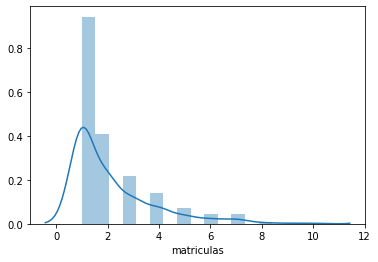

In [36]:
sns.distplot(nomes.matriculas)

In [37]:
#identificando o aluno que fez mais cursos
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
7       9
6       9
8       2
10      1
9       1
Name: matriculas, dtype: int64

In [38]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
97,BARBARA,201,@servicosdoemail.com,barbara@servicosdoemail.com,1
170,ALEXANDRO,341,@servicosdoemail.com,alexandro@servicosdoemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,2
196,ARLINDO,99,@servicosdoemail.com,arlindo@servicosdoemail.com,1
138,NEUSA,75,@dominiodoemail.com.br,neusa@dominiodoemail.com.br,2


# Selecionando cursos

In [39]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
34,CRISTIANE,350,@dominiodoemail.com.br,cristiane@dominiodoemail.com.br,1
154,NICOLE,182,@dominiodoemail.com.br,nicole@dominiodoemail.com.br,2
191,TERESA,264,@dominiodoemail.com.br,teresa@dominiodoemail.com.br,1
132,GABRIELE,72,@dominiodoemail.com.br,gabriele@dominiodoemail.com.br,2
110,LUCIENE,22,@dominiodoemail.com.br,luciene@dominiodoemail.com.br,2


In [40]:
#criando uma tabela 
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [41]:
#fazendo o loop para escolher um curso e juntar com aluno
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

#criando o dataframe de matriculas
matriculas = pd.DataFrame(todas_matriculas, columns= ['id_aluno', 'id_curso'])

In [42]:
matriculas.head()

,id_aluno,id_curso
0,235,19
1,235,19
2,43,9
3,43,1
4,43,19


In [43]:
#fazendo join entres os dataframes 
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno' : 'quantidade_alunos'})

,quantidade_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,52,Java para Web
3,25,C# para Web
4,33,Ruby on Rails
5,59,Cursos de Python
6,17,PHP com MySql
7,56,.NET para web
8,37,Novas integrações com Java
9,70,TDD com Java


In [44]:
nomes.sample(10)

,nome,id_aluno,dominio,email,matriculas
167,TAINARA,128,@servicosdoemail.com,tainara@servicosdoemail.com,2
141,NEIDE,325,@dominiodoemail.com.br,neide@dominiodoemail.com.br,1
88,GILMAR,142,@servicosdoemail.com,gilmar@servicosdoemail.com,1
15,BRUNO,293,@dominiodoemail.com.br,bruno@dominiodoemail.com.br,6
69,REGINALDO,170,@servicosdoemail.com,reginaldo@servicosdoemail.com,7
131,ANGELICA,370,@dominiodoemail.com.br,angelica@dominiodoemail.com.br,1
137,AUGUSTO,376,@dominiodoemail.com.br,augusto@dominiodoemail.com.br,1
54,REGINA,281,@dominiodoemail.com.br,regina@dominiodoemail.com.br,1
98,GILSON,134,@dominiodoemail.com.br,gilson@dominiodoemail.com.br,2
180,LIDIA,167,@dominiodoemail.com.br,lidia@dominiodoemail.com.br,1


In [45]:
matriculas_por_cursos = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno' : 'quantidade_alunos'})

In [46]:
matriculas_por_cursos.head()

,quantidade_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,52,Java para Web
3,25,C# para Web
4,33,Ruby on Rails
5,59,Cursos de Python


# Saída em diferentes formatos

In [47]:
matriculas_por_cursos.head(3)

,quantidade_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,52,Java para Web
3,25,C# para Web


In [48]:
#exportando para csv
matriculas_por_cursos.to_csv('matriculas_por_curso.csv', index=False)

In [49]:
#lendo o csv
pd.read_csv('matriculas_por_curso.csv')

,quantidade_alunos,nome_do_curso
0,62,Lógica de programação
1,52,Java para Web
2,25,C# para Web
3,33,Ruby on Rails
4,59,Cursos de Python
5,17,PHP com MySql
6,56,.NET para web
7,37,Novas integrações com Java
8,70,TDD com Java
9,12,Código limpo com C#


In [50]:
#transformando csv para json
matriculas_json = matriculas_por_cursos.to_json()

In [51]:
matriculas_json

'{"quantidade_alunos":{"1":62,"2":52,"3":25,"4":33,"5":59,"6":17,"7":56,"8":37,"9":70,"10":12,"11":81,"12":22,"13":52,"14":31,"15":82,"16":16,"17":44,"18":23,"19":67,"20":18},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [52]:
#transformando csv para html
matricula_html = matriculas_por_cursos.to_html()

In [53]:
print(matricula_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>62</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>52</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>25</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>33</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>59</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>17</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>56</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>37</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>70</td>
   

# Criando o banco de dados SQL

In [54]:
#instalando os pacotes de sql
!pip install sqlalchemy

In [55]:
#importando alguns modulos
from sqlalchemy import create_engine, MetaData, Table

In [56]:
#instanciando o objeto para o banco ser salvo na memória local
engine = create_engine('sqlite:///:memory:')

In [57]:
engine

Engine(sqlite:///:memory:)

In [58]:
#verificando o tipo do objeto
type(engine)

sqlalchemy.engine.base.Engine

In [59]:
#visualizando o df de matriculas por curso
matriculas_por_cursos.head()

,quantidade_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,52,Java para Web
3,25,C# para Web
4,33,Ruby on Rails
5,59,Cursos de Python


In [60]:
#transformando em SQL
matriculas_por_cursos.to_sql('matriculas', engine)

In [62]:
#visualizando a tabela
print(engine.table_names())

['matriculas']


# Buscando do banco sql

In [63]:
#atribuindo a constulta aum variavel
query = 'SELECT * FROM matriculas WHERE quantidade_alunos <= 20;'

In [64]:
#instanciando o pandas para ler a consulta
pd.read_sql(query, engine)

,id_curso,quantidade_alunos,nome_do_curso
0,6,17,PHP com MySql
1,10,12,Código limpo com C#
2,16,16,Estatística básica
3,20,18,Orientação objetos com Java


In [65]:
#instanciando o pandas para chamar a tabela
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_alunos'])

,nome_do_curso,quantidade_alunos
0,Lógica de programação,62
1,Java para Web,52
2,C# para Web,25
3,Ruby on Rails,33
4,Cursos de Python,59
5,PHP com MySql,17
6,.NET para web,56
7,Novas integrações com Java,37
8,TDD com Java,70
9,Código limpo com C#,12


In [66]:
#atribuindo a tabela em uma variavel
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_alunos'])

In [70]:
#realizando consulta
muitas_matriculas = muitas_matriculas.query('quantidade_alunos > 70')

In [71]:
muitas_matriculas

,nome_do_curso,quantidade_alunos
10,Preparatório para certificação Java,81
14,Análise de dados,82


# Escrevendo no banco

In [73]:
#criando uma tabela
muitas_matriculas.to_sql('muitas matriculas', con=engine)

ValueError: ignored

In [74]:
#imprimindo a tabela
print(engine.table_names())

['matriculas', 'muitas matriculas']


# Nomes dos alunos(as) da próxima turma

In [76]:
#visualizando o df
matriculas_por_cursos.head( 20)

,quantidade_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,52,Java para Web
3,25,C# para Web
4,33,Ruby on Rails
5,59,Cursos de Python
6,17,PHP com MySql
7,56,.NET para web
8,37,Novas integrações com Java
9,70,TDD com Java


In [77]:
#visualizando as matriculas
matriculas

,id_aluno,id_curso
0,235,19
1,235,19
2,43,9
3,43,1
4,43,19
...,...,...
854,383,19
855,366,2
856,366,15
857,366,6


In [79]:
#matricula de curso pesquisada é o 16
id_curso = 16
#adicionando todos que tenham 16 na matricula
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
#visualizando a turma
proxima_turma

,id_aluno,id_curso
95,259,16
155,151,16
176,179,16
178,179,16
334,368,16
354,202,16
416,389,16
424,319,16
720,184,16
742,378,16


In [80]:
#visualizando os nomes
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
188,POLIANA,369,@servicosdoemail.com,poliana@servicosdoemail.com,2
12,AMANDA,217,@servicosdoemail.com,amanda@servicosdoemail.com,1
185,SHEILA,116,@dominiodoemail.com.br,sheila@dominiodoemail.com.br,1


In [81]:
#fazendo joins do id_aluno e nome
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
147,16,VINICIOS,@servicosdoemail.com,vinicios@servicosdoemail.com,3
151,16,TEREZA,@servicosdoemail.com,tereza@servicosdoemail.com,1
179,16,TAIS,@dominiodoemail.com.br,tais@dominiodoemail.com.br,4
179,16,TAIS,@dominiodoemail.com.br,tais@dominiodoemail.com.br,4
184,16,JUNIOR,@dominiodoemail.com.br,junior@dominiodoemail.com.br,3
202,16,ESTER,@servicosdoemail.com,ester@servicosdoemail.com,8
206,16,ITALO,@dominiodoemail.com.br,italo@dominiodoemail.com.br,1
214,16,JAIME,@servicosdoemail.com,jaime@servicosdoemail.com,5
259,16,RAIMUNDA,@servicosdoemail.com,raimunda@servicosdoemail.com,1


In [83]:
#fazendo joins do id_aluno e nome e trazendo so os nomes
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
147    VINICIOS
151      TEREZA
179        TAIS
179        TAIS
184      JUNIOR
202       ESTER
206       ITALO
214       JAIME
259    RAIMUNDA
319        INES
359     ARNALDO
362     NIVALDO
368      CLEIDE
378        HUGO
389     LIDIANE
398    CRISTIAN
Name: nome, dtype: object

In [84]:
#fazendo joins do id_aluno e nome e trazendo so os nomes, transformando em DF
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
147,VINICIOS
151,TEREZA
179,TAIS
179,TAIS
184,JUNIOR
202,ESTER
206,ITALO
214,JAIME
259,RAIMUNDA


In [86]:
#trazendo os nomes do cursos
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [87]:
#trazendo só o nome do curso
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [88]:
#proxima turma
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [89]:
proxima_turma

,nome
id_aluno,
147,VINICIOS
151,TEREZA
179,TAIS
179,TAIS
184,JUNIOR
202,ESTER
206,ITALO
214,JAIME
259,RAIMUNDA


In [93]:
#finalizando o processo
proxima_turma = proxima_turma.rename(columns= {'nome' : 'Alunos Matriculados de {}'.format(nome_curso.title())})

In [94]:
proxima_turma

,Alunos Matriculados de Estatística Básica
id_aluno,
147,VINICIOS
151,TEREZA
179,TAIS
179,TAIS
184,JUNIOR
202,ESTER
206,ITALO
214,JAIME
259,RAIMUNDA


# Trabalhando com Excel

In [95]:
#convertando o df em excel
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [96]:
#lendo o arquivo do excel
pd.read_excel('proxima_turma.xlsx')

,Alunos Matriculados de Estatística Básica
0,VINICIOS
1,TEREZA
2,TAIS
3,TAIS
4,JUNIOR
5,ESTER
6,ITALO
7,JAIME
8,RAIMUNDA
9,INES
